<a href="https://colab.research.google.com/github/luyuzhe111/machine-learning-foundamentals/blob/main/kernel_trick_for_distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pickle
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
with open('hw3_p1.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

In [4]:
class KNN():
  def __init__(self, k, compute_distance):
    self.k = k
    self.compute_distance = compute_distance
  
  def train(self, train_x, train_y):
    self.train_x = train_x
    self.train_y = train_y
  
  def test(self, test_x, test_y):
    distances = self.compute_distance(test_x, self.train_x)
    sorted_ind = np.argsort(distances, axis=1)
    knn_labels = self.train_y[sorted_ind[:, :self.k]]
    preds = stats.mode(knn_labels.T)[0][0]

    return accuracy_score(test_y, preds)

### Euclidean kNN

In [5]:
def euclidean_distance(target, base):
  dist_mat = (np.expand_dims(target, 1) - np.expand_dims(base, 0)) ** 2
  return np.sum(dist_mat, axis=-1)

In [6]:
ed_accs = []
knns = range(1, 26)
for k in knns:
  model = KNN(k, euclidean_distance)
  model.train(x_train, y_train)
  ed_accs.append(model.test(x_test, y_test))

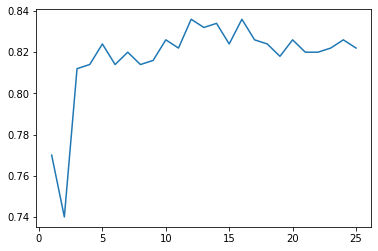

In [7]:
plt.plot(knns, ed_accs)
plt.show()

### Kernelized kNN

In [119]:
def kernelize(target, base):
  if (target==base).all():
    return (target * target).sum(1) * (base * base).sum(1)
  else:
    target_dots = (target * target).sum(1)
    base_dots = (base * base).sum(1)
  return np.expand_dims(target_dots, 1) * np.expand_dims(base_dots, 0)

In [120]:
def kernelized_distance(target, base):
  return kernelize(target, target) - 2 * kernelize(target, base) + kernelize(base, base)

In [124]:
kd_accs = []
for k in knns:
  model = KNN(k, kernelized_distance)
  model.train(x_train, y_train)
  kd_accs.append(model.test(x_test, y_test))

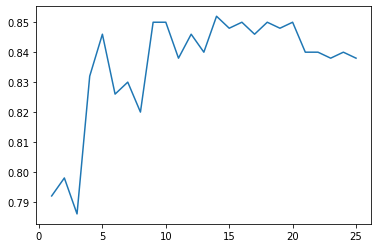

In [125]:
plt.plot(knns, kd_accs)
plt.show()

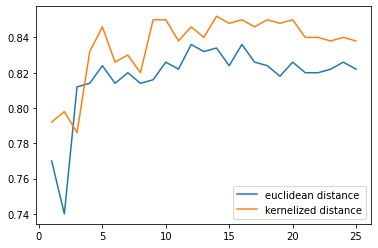

In [127]:
plt.plot(knns, ed_accs, label='euclidean distance')
plt.plot(knns, kd_accs, label='kernelized distance')
plt.legend()
plt.show()